[View in Colaboratory](https://colab.research.google.com/github/MahmoudFarouq/DLmodels/blob/master/LeNet.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def ConvLayer(prev_output, ksize, out_filters, strides, padding):
  
  kernels = tf.Variable(tf.truncated_normal(shape=ksize,
                                            mean=0, 
                                            stddev=0.1))
  
  b = tf.Variable(tf.constant(0.1, shape=[out_filters]))
  
  conv = tf.nn.conv2d(input=prev_output, 
                      filter=kernels,
                      strides=strides,
                      padding=padding)
  out = tf.nn.relu(conv + b)
  return out

In [0]:
def MaxPoolingLayer(X, ksize, strides, padding):
  return tf.nn.max_pool(value=X, ksize=ksize, strides=strides, padding=padding)

In [0]:
def addZeroPadding(X, padding):
  return tf.pad(X, padding)

In [0]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='inputs')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='targets')

X_1 = addZeroPadding(X, ((0, 0), (2, 2), (2, 2), (0, 0)) ) # shape becomes [None, 32, 32, 1]

f = 5
s = 1
ksize = [f,f,1,8]
strides = [1,s,s,1]
padding = 'VALID'
X_2 = ConvLayer(X_1, ksize, 8, strides, padding)

In [7]:
X_2.get_shape().as_list()

[None, 28, 28, 8]

In [0]:
X_3 = MaxPoolingLayer(X_2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')

In [10]:
X_3.get_shape().as_list()

[None, 14, 14, 8]

In [0]:
f = 5
s = 1
ksize = [f,f,8,16]
strides = [1,s,s,1]
padding = 'VALID'
X_4 = ConvLayer(X_3, ksize, 16, strides, padding)

In [12]:
X_4.get_shape().as_list()

[None, 10, 10, 16]

In [0]:
X_5 = MaxPoolingLayer(X_4, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')

In [14]:
X_5.get_shape().as_list()

[None, 5, 5, 16]

In [0]:
X_6 = tf.contrib.layers.flatten(X_5)

In [16]:
X_6.get_shape().as_list()

[None, 400]

In [0]:
X_7 = tf.contrib.layers.fully_connected(X_6, 120)

In [18]:
X_7.get_shape().as_list()

[None, 120]

In [0]:
X_8 = tf.contrib.layers.fully_connected(X_7, 84)

In [0]:
y_pred = tf.contrib.layers.fully_connected(X_8, 10, activation_fn=tf.nn.softmax)
predictor = tf.argmax(y_pred, axis=1, name='predictor')

In [21]:
y_pred.get_shape().as_list()

[None, 10]

In [0]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=y_pred) , name='loss')

In [0]:
optim = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [0]:
argmax = tf.equal( tf.argmax(Y, 1), tf.argmax(y_pred, 1))
cast = tf.cast( argmax, dtype=tf.float32)
accuracy = tf.reduce_sum(cast, name='accuracy')

In [0]:
sess = tf.Session()

In [26]:
sess.run(tf.global_variables_initializer())

n_epoch = 1000
for i in range(n_epoch):
  images, labels = mnist.train.next_batch(124)
  images = tf.reshape(images, (-1, 28, 28, 1)).eval(session=sess)
  _, l = sess.run([optim, loss], feed_dict={X:images, Y:labels})
  if i % 10 == 0:
    acc = sess.run(accuracy, feed_dict={X:images, Y:labels})
    acc = acc/128
    print('the loss at epoch %d: %f --> with accuracy: %f'%(i, l, acc))
    

the loss at epoch 0: 2.298527 --> with accuracy: 0.109375
the loss at epoch 10: 2.200021 --> with accuracy: 0.390625
the loss at epoch 20: 1.970062 --> with accuracy: 0.625000
the loss at epoch 30: 1.778791 --> with accuracy: 0.710938
the loss at epoch 40: 1.818066 --> with accuracy: 0.640625
the loss at epoch 50: 1.824753 --> with accuracy: 0.609375
the loss at epoch 60: 1.695131 --> with accuracy: 0.757812
the loss at epoch 70: 1.732646 --> with accuracy: 0.750000
the loss at epoch 80: 1.709387 --> with accuracy: 0.710938
the loss at epoch 90: 1.660050 --> with accuracy: 0.789062
the loss at epoch 100: 1.597186 --> with accuracy: 0.843750
the loss at epoch 110: 1.684231 --> with accuracy: 0.773438
the loss at epoch 120: 1.614808 --> with accuracy: 0.835938
the loss at epoch 130: 1.682726 --> with accuracy: 0.765625
the loss at epoch 140: 1.663325 --> with accuracy: 0.781250
the loss at epoch 150: 1.673309 --> with accuracy: 0.773438
the loss at epoch 160: 1.635360 --> with accuracy: 

the loss at epoch 570: 1.576162 --> with accuracy: 0.867188
the loss at epoch 580: 1.597430 --> with accuracy: 0.835938
the loss at epoch 590: 1.583268 --> with accuracy: 0.843750
the loss at epoch 600: 1.578907 --> with accuracy: 0.859375
the loss at epoch 610: 1.620343 --> with accuracy: 0.820312
the loss at epoch 620: 1.627916 --> with accuracy: 0.812500
the loss at epoch 630: 1.590242 --> with accuracy: 0.851562
the loss at epoch 640: 1.578177 --> with accuracy: 0.859375
the loss at epoch 650: 1.556975 --> with accuracy: 0.882812
the loss at epoch 660: 1.594124 --> with accuracy: 0.843750
the loss at epoch 670: 1.610697 --> with accuracy: 0.828125
the loss at epoch 680: 1.528740 --> with accuracy: 0.906250
the loss at epoch 690: 1.596094 --> with accuracy: 0.843750
the loss at epoch 700: 1.535089 --> with accuracy: 0.898438
the loss at epoch 710: 1.591300 --> with accuracy: 0.843750
the loss at epoch 720: 1.556545 --> with accuracy: 0.882812
the loss at epoch 730: 1.561134 --> with

In [27]:
sum_ = 0
for i in range(20):
  test_batch = mnist.test.next_batch(200)
  batch_acc = sess.run(accuracy, feed_dict={X: test_batch[0].reshape([-1, 28, 28, 1]), Y: test_batch[1]})
  sum_ += batch_acc

print("test accuracy %g"%(sum_/4000))

test accuracy 0.88275


In [0]:
test_batch = mnist.test.next_batch(200)
def Test(index):
  testImg  = test_batch[0][index].reshape(1, 28, 28, 1)
  testImgL = test_batch[1][index].reshape(1, 10)
  res = sess.run( predictor, feed_dict={'inputs:0':testImg} )
  print("predicted: %f"%res)
  plt.imshow(testImg.reshape(28, 28))
  plt.show()

predicted: 5.000000


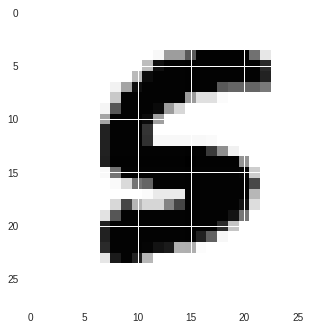

In [31]:
Test(18)

In [0]:
saver = tf.train.Saver()

In [33]:
SAVE_PATH = './save'
MODEL_NAME = 'LeNet'

import os
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

path = saver.save(sess, SAVE_PATH + '/' + MODEL_NAME + '.ckpt')
print("saved at {}".format(path))

saved at ./save/LeNet.ckpt


In [34]:
!ls ./save

checkpoint  LeNet.ckpt.data-00000-of-00001  LeNet.ckpt.index  LeNet.ckpt.meta


In [0]:
sess.close()

In [36]:
SAVE_PATH = './save'
MODEL_NAME = 'LeNet'

sess = tf.Session()
checkpoint = tf.train.latest_checkpoint(SAVE_PATH)
graph = tf.get_default_graph()
saver = tf.train.import_meta_graph(checkpoint + '.meta')
saver.restore(sess, checkpoint)

loss = graph.get_tensor_by_name('loss:0')
test = mnist.test.next_batch(200)
test_loss = sess.run(loss, feed_dict={'inputs:0': test[0].reshape(-1, 28, 28, 1), 'targets:0': test[1]})
print("TEST LOSS = {:0.4f}".format(test_loss))

INFO:tensorflow:Restoring parameters from ./save/LeNet.ckpt
TEST LOSS = 1.5814


In [0]:
predictor = graph.get_tensor_by_name('predictor:0')

predicted: 8.000000


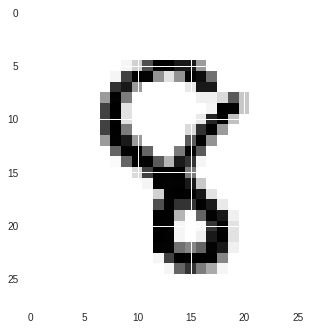

In [38]:
Test(15)

In [39]:
!pip3 install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

def upload(path, folder_id):
	# Authenticate and create the PyDrive client.
	auth.authenticate_user()
	gauth = GoogleAuth()
	gauth.credentials = GoogleCredentials.get_application_default()
	drive = GoogleDrive(gauth)
	if not os.path.exists(path):
		print("wrong path")
		return
	if os.path.isfile(path):
		uploadFile(drive, path, folder_id)
	else:
		uploadDirectory(drive, path, folder_id)


def uploadDirectory(drive, directoryPath, folder_id):
	# create foder in drive under folder with folder id = folder_id

	dirName = getName(directoryPath)
	print("uploading directory : {name}".format(name=dirName))
	metadata = {'parents':[{u'id': folder_id}], 'title' : dirName, 'mimeType' : 'application/vnd.google-apps.folder'}
	folder = drive.CreateFile(metadata)
	folder.Upload()
	new_folder_id = folder.attr['metadata']['id']

	for element in os.listdir(directoryPath):
		elementPath = os.path.join(directoryPath, element)
		if os.path.isfile(elementPath):
			uploadFile(drive, elementPath, new_folder_id)
		elif os.path.isdir(elementPath):
			uploadDirectory(drive, elementPath, new_folder_id)
	
	print("uploaded directory  : {name}".format(name=dirName))

def uploadFile(drive, filePath, folder_id):
	if os.stat(filePath).st_size == 0:
		return
	print("uploading file : {name}".format(name=filePath))
	file = drive.CreateFile({'parents':[{u'id': folder_id}], 'title':getName(filePath)})
	file.SetContentFile(filePath)
	file.Upload()
	print("uploaded file  : {name}".format(name=filePath))


def getName(path):
	return path.split('/')[-1] if path.split('/')[-1] != '' else path.split('/')[-2]

In [41]:
colab_folder = '1AHB09g_MMM73vmCGEgrg0MVzzKih0Uh_'
upload('./save', colab_folder)

uploading directory : save
uploading file : ./save/LeNet.ckpt.index
uploaded file  : ./save/LeNet.ckpt.index
uploading file : ./save/checkpoint
uploaded file  : ./save/checkpoint
uploading file : ./save/LeNet.ckpt.meta
uploaded file  : ./save/LeNet.ckpt.meta
uploading file : ./save/LeNet.ckpt.data-00000-of-00001
uploaded file  : ./save/LeNet.ckpt.data-00000-of-00001
uploaded directory  : save
